In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../CrabAgePrediction.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 0] = label_encoder.fit_transform(X.iloc[:, 0])
X

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,1,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,0,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,1,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970
...,...,...,...,...,...,...,...,...
3888,0,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637
3889,0,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577
3890,1,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864
3891,1,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698


## Scatter Plot of In-dependent variable with dependent variable

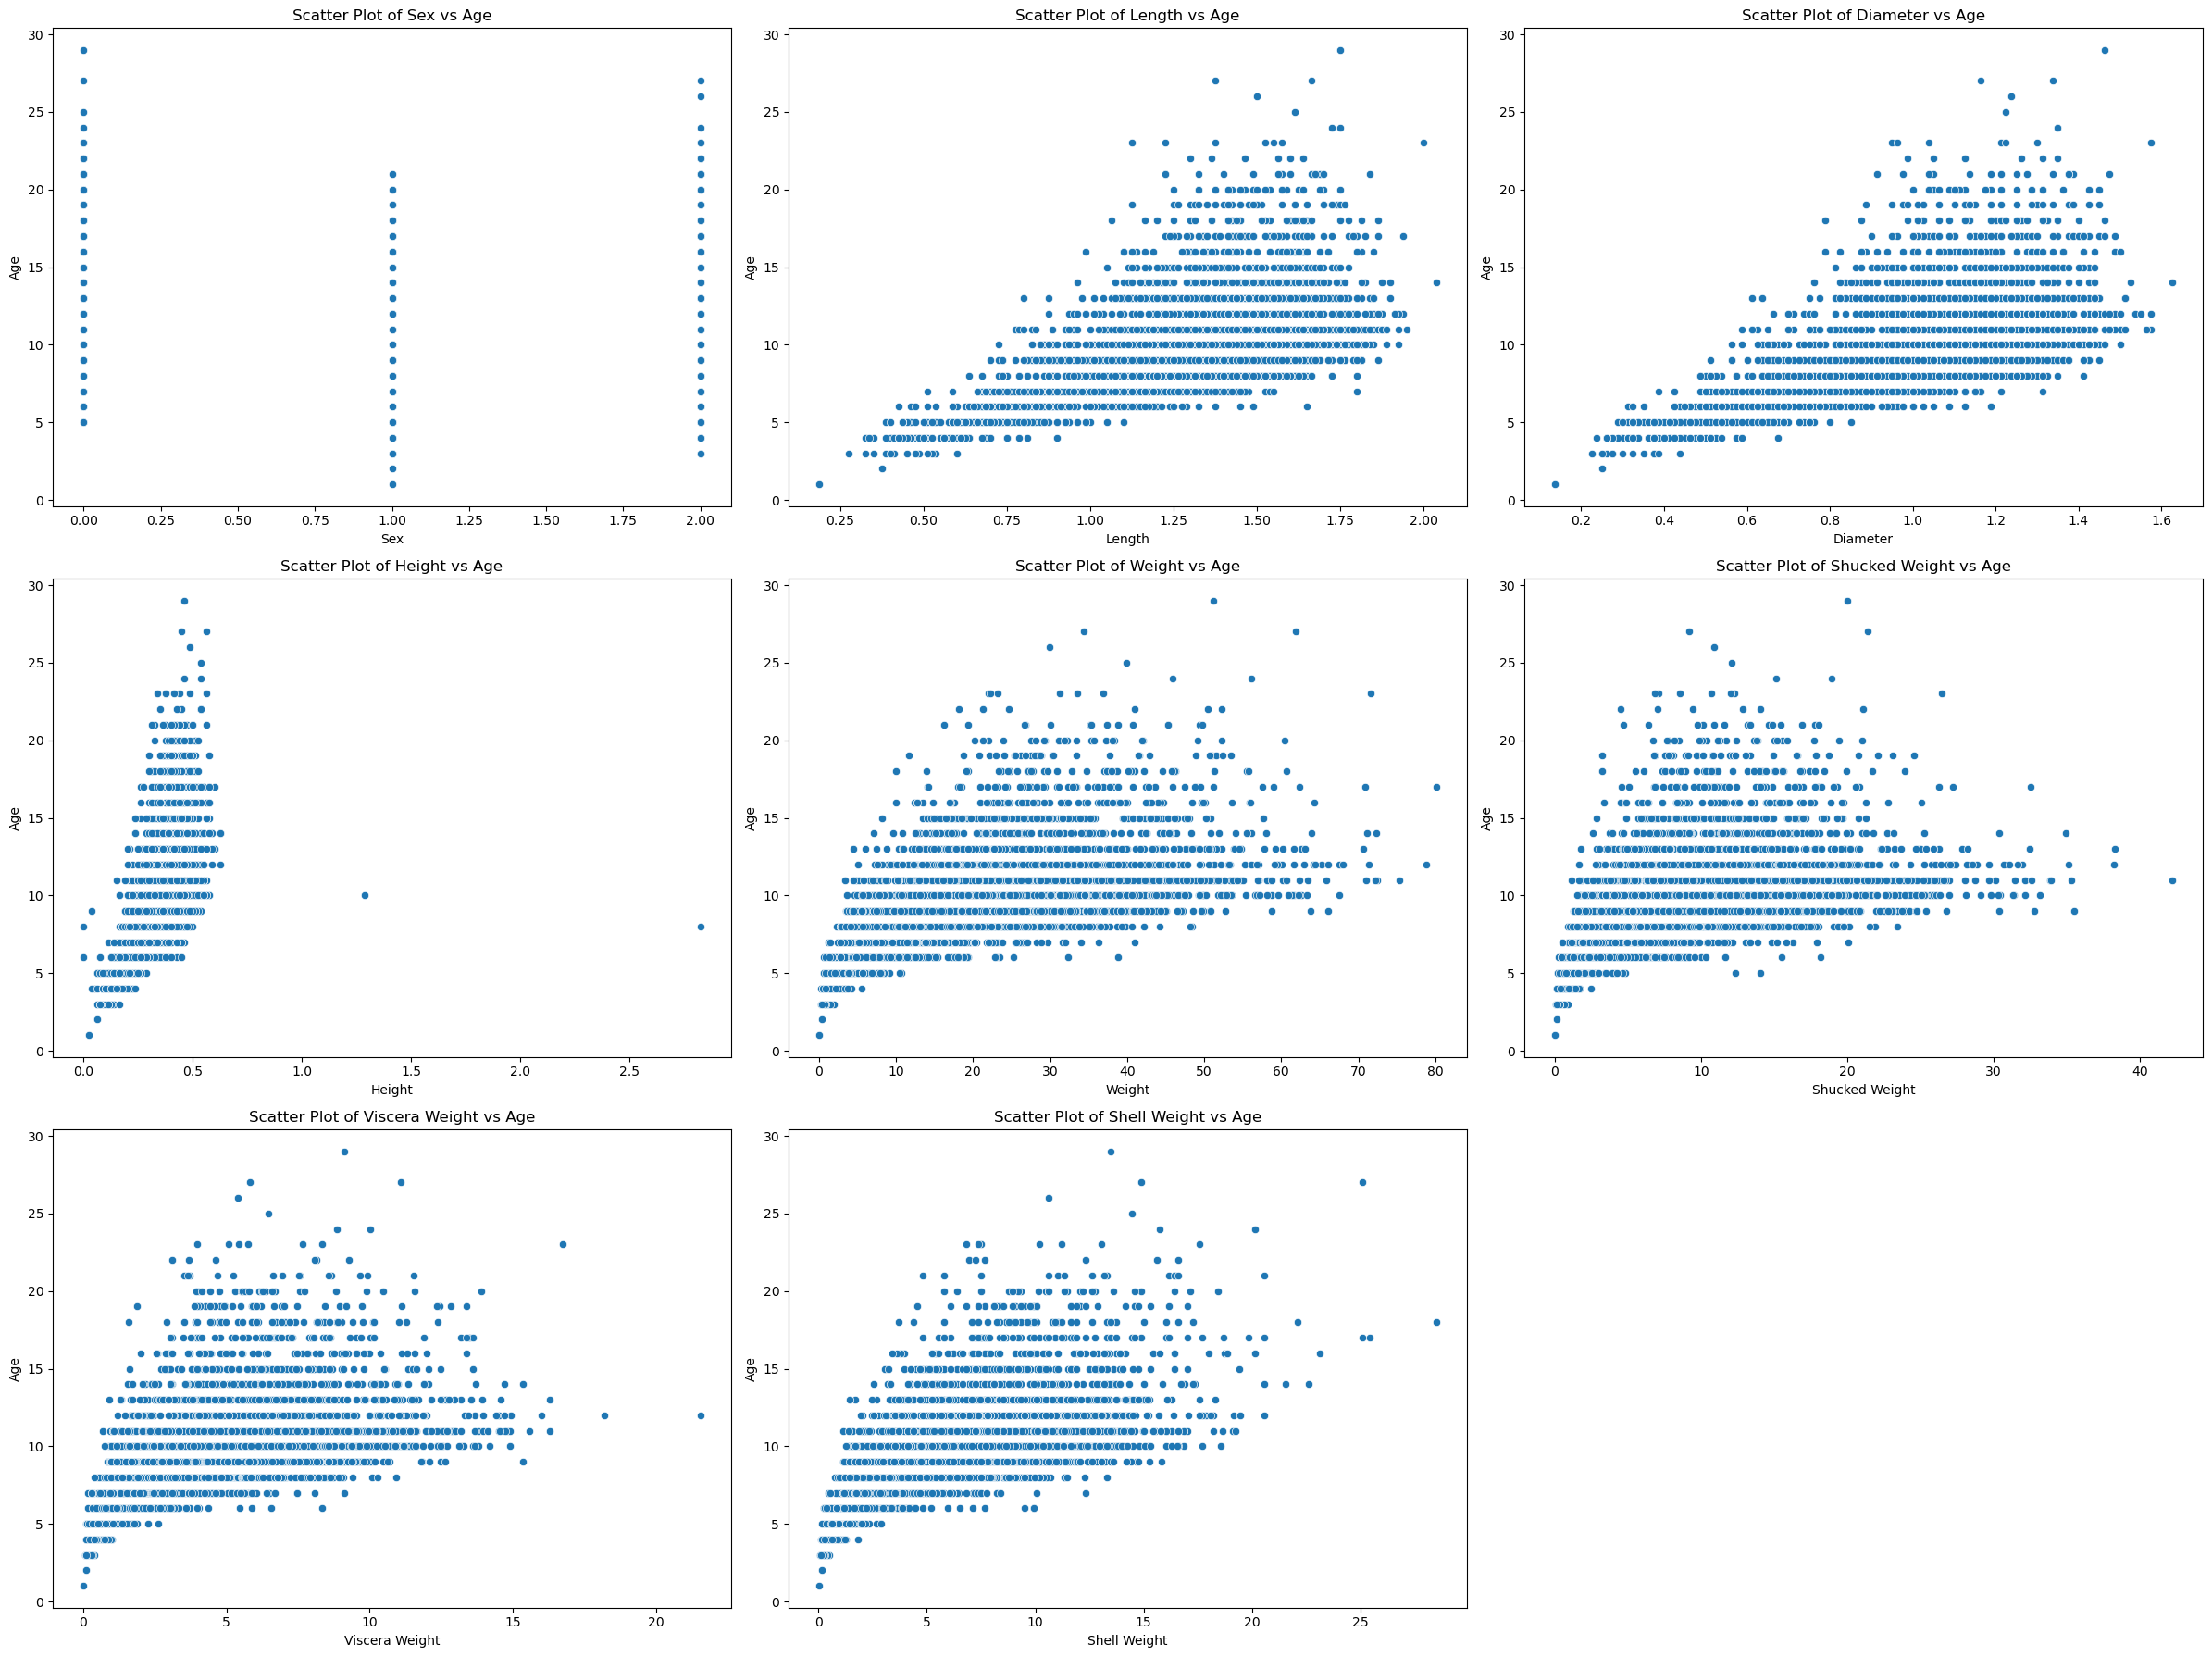

In [4]:

# dependent_var = 'Age'

# for var in list(X.columns):
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X[var], y=Y)
#     plt.title(f'Scatter Plot of {var} vs {dependent_var}')
#     plt.xlabel(var)
#     plt.ylabel(dependent_var)
#     plt.show()



dependent_var = 'Age'

# Determine the number of columns and rows
num_cols = 3
num_plots = len(X.columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # This ensures enough rows

# Adjust the figsize to maintain the 8x6 size for each subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, var in enumerate(X.columns):
    ax = axes[i]
    sns.scatterplot(x=X[var], y=Y, ax=ax)
    ax.set_title(f'Scatter Plot of {var} vs {dependent_var}')
    ax.set_xlabel(var)
    ax.set_ylabel(dependent_var)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Argument should be categorial data feild


# Country column
# Assuming X is your dataset
# Define the ColumnTransformer with OneHotEncoder for the first column (index 0)
ct = ColumnTransformer(
    transformers=[
        ('sex', OneHotEncoder(drop='first'), [0])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[ 0.        ,  0.        ,  1.4375    , ..., 12.3320325 ,
         5.5848515 ,  6.747181  ],
       [ 0.        ,  1.        ,  0.8875    , ...,  2.2963095 ,
         1.37495075,  1.5592225 ],
       [ 1.        ,  0.        ,  1.0375    , ...,  3.231843  ,
         1.60174675,  2.76407625],
       ...,
       [ 1.        ,  0.        ,  0.625     , ...,  0.7654365 ,
         0.52446575,  0.63786375],
       [ 1.        ,  0.        ,  1.0625    , ...,  4.5075705 ,
         2.33883375,  2.9766975 ],
       [ 1.        ,  0.        ,  0.7875    , ...,  1.5025235 ,
         1.34660125,  1.417475  ]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)





In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize Neural Network
regressor = Sequential()

# Input layer
regressor.add(Dense(units=4, kernel_initializer='uniform', activation='relu', input_dim=9))

#Hidden Layer
regressor.add(Dense(units=2, kernel_initializer='uniform', activation='relu'))

# Output layer (regression)
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
# regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mse'])
# Train ANN
regressor.fit(X_train, Y_train, batch_size=10, epochs=200)


Epoch 1/200
312/312 [==============================] - 4s 8ms/step - loss: 87.0784 - mse: 87.0784
Epoch 2/200
312/312 [==============================] - 2s 6ms/step - loss: 29.0962 - mse: 29.0962
Epoch 3/200
312/312 [==============================] - 2s 5ms/step - loss: 19.6966 - mse: 19.6966
Epoch 4/200
312/312 [==============================] - 2s 5ms/step - loss: 13.5742 - mse: 13.5742
Epoch 5/200
312/312 [==============================] - 2s 6ms/step - loss: 9.4658 - mse: 9.4658
Epoch 6/200
312/312 [==============================] - 2s 6ms/step - loss: 7.3006 - mse: 7.3006
Epoch 7/200
312/312 [==============================] - 3s 8ms/step - loss: 6.2552 - mse: 6.2552
Epoch 8/200
312/312 [==============================] - 2s 7ms/step - loss: 5.7432 - mse: 5.7432
Epoch 9/200
312/312 [==============================] - 3s 8ms/step - loss: 5.4800 - mse: 5.4800
Epoch 10/200
312/312 [==============================] - 2s 8ms/step - loss: 5.3234 - mse: 5.3234
Epoch 11/200
312/312 [=========

In [12]:
# Predicting the test set results
Y_pred = regressor.predict(X_test)

25/25 [==============================] - 0s 6ms/step


# Accuracy Check

In [13]:

# Evaluating the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute R-Squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-Squared (R2) score:", r2)


Mean Squared Error (MSE): 4.787916709775226
Mean Absolute Error (MAE): 1.579712714096089
R-Squared (R2) score: 0.5537997739321912
